Summary of Results:

The average number of people on commercial planes was  36 and the average number of fatalities was 25.
Therefore the chance of survival on plane crashes with 1 or more more fatalities is 31.6 percent.
The number of commercial plane crashes with one fatality or more is 1078.

The most common areas for aircraft failure are:
Hawaii with 6 incidents, Alaska with 5 incidents and Arizona with 2 incidents.

See chart of Number of Accidents Per Year. 

In [128]:
# Starting plane crash jupyter notebook and 
# import dependences

import pandas as pd
import numpy as np
import csv

In [129]:
# start with reading csv file
plane =  pd.read_csv("Airplane_Crashes.csv")

plane

plane[plane['DATE'].str.contains('2020')]

,DATE,TIME,LOCATION,OPERATOR,FLIGHT#,ROUTE,AIRCRAFT_TYPE,AIRCRAFT_REG,CN_LN,TOTAL_ONBOARD,PASSENGER_ONBOARD,CREW_ONBOARD,TOTAL_FATALITIES,PASSENGER_FATALITIES,CREW_FATALITIES,GROUND_CASUALTIES,SUMMARY_OF_EVENTS
4972,01/02/2020,NaN,"Geneina, Sudan",Military - Sudanese Air Force,NaN,NaN,Antonov An12-A,NaN,NaN,18.0,9.0,9.0,18.0,9.0,9.0,0.0,The aircraft crashed shortly after taking off ...
4973,01/08/2020,NaN,"Near Shahriah, Iran",Ukraine International Airlines,PS752,Tehran - Kiev,Boeing 737-8KV WL,UR-PSR,38124/5977,176.0,167.0,9.0,176.0,167.0,9.0,0.0,The plane took off from Tehran International A...
4974,02/05/2020,NaN,"Istanbul, Turkey",Pegasus Airlines,PC2193,Izmir - Istanbul,Boeing 737-86J,TC-IZK,37742,183.0,177.0,6.0,183.0,177.0,6.0,0.0,While landing duriing high winds and heavey ra...


In [130]:
contain_date = plane[plane['DATE'].str.contains('1991')]
contain_date.head()


,DATE,TIME,LOCATION,OPERATOR,FLIGHT#,ROUTE,AIRCRAFT_TYPE,AIRCRAFT_REG,CN_LN,TOTAL_ONBOARD,PASSENGER_ONBOARD,CREW_ONBOARD,TOTAL_FATALITIES,PASSENGER_FATALITIES,CREW_FATALITIES,GROUND_CASUALTIES,SUMMARY_OF_EVENTS
3660,01/10/1991,18:00,"Near Paramo Mucuti, Venezuela",Military - Venezuelan Navy,NaN,Caracas - Merida,CASA 212 Aviocar 200,ARV-0209,264,22.0,19.0,3.0,21.0,18.0,3.0,0.0,"Crashed into Paramo Mucuti Mountain, 35 miles ..."
3661,01/30/1991,13:00,"Jalaludin, Indonesia",Merpati Nusantara Airlines,NaN,Manado - Gorontalo,CASA 212 Aviocar 200,PK-NCY,258/78N,21.0,18.0,3.0,1.0,1.0,0.0,0.0,The plane made a forced landing during poor we...
3662,01/31/1991,NaN,"Near Ras Al Khafji, Saudi Arabia",Military - U.S. Air Force,NaN,NaN,Lockheed AC-130H Hercules,69-6567,4341,14.0,0.0,14.0,14.0,0.0,14.0,0.0,Shot down by a surface-to-air missile during o...
3663,02/01/1991,18:07,"LAX, Los Angeles, California",USAir / Skywest Airlines,1493/5569,Columbus - Los Angeles \ Los Angeles - Fresno,Boeing B-737-300 / Swearingen SA-227AC,N388US/N683AV,23310/1145 / AC-683,101.0,93.0,8.0,34.0,30.0,4.0,0.0,The Skywest Metroliner was told to taxi into p...
3664,02/05/1991,12:51,"Near Nea Ankhialos, Greece",Military - Hellenic Air Force,NaN,Elefsis AB - Volos-Néa Anchialos,Lockheed C-130H,748,4724,63.0,59.0,4.0,63.0,59.0,4.0,0.0,The aircraft flew into the summit of Mt. .Othr...


In [131]:
plane.dtypes

DATE                     object
TIME                     object
LOCATION                 object
OPERATOR                 object
FLIGHT#                  object
ROUTE                    object
AIRCRAFT_TYPE            object
AIRCRAFT_REG             object
CN_LN                    object
TOTAL_ONBOARD           float64
PASSENGER_ONBOARD       float64
CREW_ONBOARD            float64
TOTAL_FATALITIES        float64
PASSENGER_FATALITIES    float64
CREW_FATALITIES         float64
GROUND_CASUALTIES       float64
SUMMARY_OF_EVENTS        object
dtype: object

In [132]:
# Remove unnecessary columns
del plane["AIRCRAFT_REG"]
del plane["CN_LN"]
del plane["FLIGHT#"]
plane

,DATE,TIME,LOCATION,OPERATOR,ROUTE,AIRCRAFT_TYPE,TOTAL_ONBOARD,PASSENGER_ONBOARD,CREW_ONBOARD,TOTAL_FATALITIES,PASSENGER_FATALITIES,CREW_FATALITIES,GROUND_CASUALTIES,SUMMARY_OF_EVENTS
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army Air Forces,Demonstration,Wright Flyer III,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",Unknown,Air show,Wright Byplane,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4970,11/24/2019,NaN,"Goma, Democratic Republic of Congo",Busy Bee Congo,NaN,Dornier 228-201,19.0,17.0,2.0,19.0,17.0,2.0,10.0,The passenger plane crashed about a minute aft...
4971,12/27/2019,07:22,"Almaty, Kazakhstan",Bek Air,Almaty - Nursultan Nazabavev,Fokker 100,98.0,95.0,3.0,13.0,NaN,NaN,7.0,"While taking off, the tail of the plane struck..."
4972,01/02/2020,NaN,"Geneina, Sudan",Military - Sudanese Air Force,NaN,Antonov An12-A,18.0,9.0,9.0,18.0,9.0,9.0,0.0,The aircraft crashed shortly after taking off ...
4973,01/08/2020,NaN,"Near Shahriah, Iran",Ukraine International Airlines,Tehran - Kiev,Boeing 737-8KV WL,176.0,167.0,9.0,176.0,167.0,9.0,0.0,The plane took off from Tehran International A...


In [133]:
# need to drop dates before 1991 but can't using current format---using datetime
plane["DATE"]= pd.to_datetime(plane["DATE"])

# '01/10/1991' tenth of Jan ----checked 1991 data 
start_date = '1991-01-10'

# end_date = '02/05/2020' Don't need an end date
plane_1991_2021 = plane[(plane['DATE'] >= start_date)]

plane_1991_2021



,DATE,TIME,LOCATION,OPERATOR,ROUTE,AIRCRAFT_TYPE,TOTAL_ONBOARD,PASSENGER_ONBOARD,CREW_ONBOARD,TOTAL_FATALITIES,PASSENGER_FATALITIES,CREW_FATALITIES,GROUND_CASUALTIES,SUMMARY_OF_EVENTS
3660,1991-01-10,18:00,"Near Paramo Mucuti, Venezuela",Military - Venezuelan Navy,Caracas - Merida,CASA 212 Aviocar 200,22.0,19.0,3.0,21.0,18.0,3.0,0.0,"Crashed into Paramo Mucuti Mountain, 35 miles ..."
3661,1991-01-30,13:00,"Jalaludin, Indonesia",Merpati Nusantara Airlines,Manado - Gorontalo,CASA 212 Aviocar 200,21.0,18.0,3.0,1.0,1.0,0.0,0.0,The plane made a forced landing during poor we...
3662,1991-01-31,NaN,"Near Ras Al Khafji, Saudi Arabia",Military - U.S. Air Force,NaN,Lockheed AC-130H Hercules,14.0,0.0,14.0,14.0,0.0,14.0,0.0,Shot down by a surface-to-air missile during o...
3663,1991-02-01,18:07,"LAX, Los Angeles, California",USAir / Skywest Airlines,Columbus - Los Angeles \ Los Angeles - Fresno,Boeing B-737-300 / Swearingen SA-227AC,101.0,93.0,8.0,34.0,30.0,4.0,0.0,The Skywest Metroliner was told to taxi into p...
3664,1991-02-05,12:51,"Near Nea Ankhialos, Greece",Military - Hellenic Air Force,Elefsis AB - Volos-Néa Anchialos,Lockheed C-130H,63.0,59.0,4.0,63.0,59.0,4.0,0.0,The aircraft flew into the summit of Mt. .Othr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4970,2019-11-24,NaN,"Goma, Democratic Republic of Congo",Busy Bee Congo,NaN,Dornier 228-201,19.0,17.0,2.0,19.0,17.0,2.0,10.0,The passenger plane crashed about a minute aft...
4971,2019-12-27,07:22,"Almaty, Kazakhstan",Bek Air,Almaty - Nursultan Nazabavev,Fokker 100,98.0,95.0,3.0,13.0,NaN,NaN,7.0,"While taking off, the tail of the plane struck..."
4972,2020-01-02,NaN,"Geneina, Sudan",Military - Sudanese Air Force,NaN,Antonov An12-A,18.0,9.0,9.0,18.0,9.0,9.0,0.0,The aircraft crashed shortly after taking off ...
4973,2020-01-08,NaN,"Near Shahriah, Iran",Ukraine International Airlines,Tehran - Kiev,Boeing 737-8KV WL,176.0,167.0,9.0,176.0,167.0,9.0,0.0,The plane took off from Tehran International A...


In [134]:
# check for Boeing aircraft manufacturer

# Boeing = plane[plane['AIRCRAFT_TYPE'].str.contains('Boeing')]

plane_1991_2021['AIRCRAFT_TYPE'].str.contains('Boeing')

3660    False
3661    False
3662    False
3663     True
3664    False
        ...  
4970    False
4971    False
4972    False
4973     True
4974     True
Name: AIRCRAFT_TYPE, Length: 1315, dtype: object

In [135]:
# Lets take a look at the data in the Military and see if we want to analise it separately.
military = plane_1991_2021[plane_1991_2021['OPERATOR'].str.contains('Military')]
military.head()



,DATE,TIME,LOCATION,OPERATOR,ROUTE,AIRCRAFT_TYPE,TOTAL_ONBOARD,PASSENGER_ONBOARD,CREW_ONBOARD,TOTAL_FATALITIES,PASSENGER_FATALITIES,CREW_FATALITIES,GROUND_CASUALTIES,SUMMARY_OF_EVENTS
3660,1991-01-10,18:00,"Near Paramo Mucuti, Venezuela",Military - Venezuelan Navy,Caracas - Merida,CASA 212 Aviocar 200,22.0,19.0,3.0,21.0,18.0,3.0,0.0,"Crashed into Paramo Mucuti Mountain, 35 miles ..."
3662,1991-01-31,NaN,"Near Ras Al Khafji, Saudi Arabia",Military - U.S. Air Force,NaN,Lockheed AC-130H Hercules,14.0,0.0,14.0,14.0,0.0,14.0,0.0,Shot down by a surface-to-air missile during o...
3664,1991-02-05,12:51,"Near Nea Ankhialos, Greece",Military - Hellenic Air Force,Elefsis AB - Volos-Néa Anchialos,Lockheed C-130H,63.0,59.0,4.0,63.0,59.0,4.0,0.0,The aircraft flew into the summit of Mt. .Othr...
3665,1991-02-14,NaN,"Near Taisha, Ecuador",Military - Ecuador Air Force,Macao - Taisha,De Havilland Canada DHC-6 Twin Otter 300,22.0,19.0,3.0,22.0,19.0,3.0,0.0,Crashed into the side of Mt. Paso Macunaa at 5...
3668,1991-02-22,NaN,"Cazombo, Angola",Military - Angolan Air Force,Luena-Cazombo,Antonov AN-26,47.0,43.0,4.0,47.0,43.0,4.0,0.0,Shot down by surface-to-air missile launced by...


In [136]:
# df[df[“column_name”].str.contains(“string”)==False] method to drop strings with military
non_military = plane_1991_2021[plane_1991_2021['OPERATOR'].str.contains('Military')==False]
non_military


,DATE,TIME,LOCATION,OPERATOR,ROUTE,AIRCRAFT_TYPE,TOTAL_ONBOARD,PASSENGER_ONBOARD,CREW_ONBOARD,TOTAL_FATALITIES,PASSENGER_FATALITIES,CREW_FATALITIES,GROUND_CASUALTIES,SUMMARY_OF_EVENTS
3661,1991-01-30,13:00,"Jalaludin, Indonesia",Merpati Nusantara Airlines,Manado - Gorontalo,CASA 212 Aviocar 200,21.0,18.0,3.0,1.0,1.0,0.0,0.0,The plane made a forced landing during poor we...
3663,1991-02-01,18:07,"LAX, Los Angeles, California",USAir / Skywest Airlines,Columbus - Los Angeles \ Los Angeles - Fresno,Boeing B-737-300 / Swearingen SA-227AC,101.0,93.0,8.0,34.0,30.0,4.0,0.0,The Skywest Metroliner was told to taxi into p...
3666,1991-02-17,00:20,"Cleveland, Ohio",Ryan International Airlines,Cleveland - Indianapolis,McDonnell Douglas DC-9-15RC,2.0,0.0,2.0,2.0,0.0,2.0,0.0,The cargo plane stalled during takeoff cart wh...
3667,1991-02-20,15:24,"Puerto Williams, Chile",LAN,Punta Arenas - Puerto Williams,British Aerospace BAE-146-200A,72.0,65.0,7.0,20.0,20.0,0.0,0.0,The plane overran the runway on approach and s...
3669,1991-03-03,09:44,"Near Colorado Springs, Colorado",United Air Lines,Denver - Colorado Springs,Boeing B-737-291,25.0,20.0,5.0,25.0,20.0,5.0,0.0,"While on final approach to Colorado Springs, t..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4969,2019-10-04,NaN,"Lviv, Ukraine",Ukraine Air Alliance,Spain – Turkey,Antonov An-12BK,8.0,1.0,7.0,5.0,1.0,4.0,0.0,"The chartered cargo plane, planning to stop fo..."
4970,2019-11-24,NaN,"Goma, Democratic Republic of Congo",Busy Bee Congo,NaN,Dornier 228-201,19.0,17.0,2.0,19.0,17.0,2.0,10.0,The passenger plane crashed about a minute aft...
4971,2019-12-27,07:22,"Almaty, Kazakhstan",Bek Air,Almaty - Nursultan Nazabavev,Fokker 100,98.0,95.0,3.0,13.0,NaN,NaN,7.0,"While taking off, the tail of the plane struck..."
4973,2020-01-08,NaN,"Near Shahriah, Iran",Ukraine International Airlines,Tehran - Kiev,Boeing 737-8KV WL,176.0,167.0,9.0,176.0,167.0,9.0,0.0,The plane took off from Tehran International A...


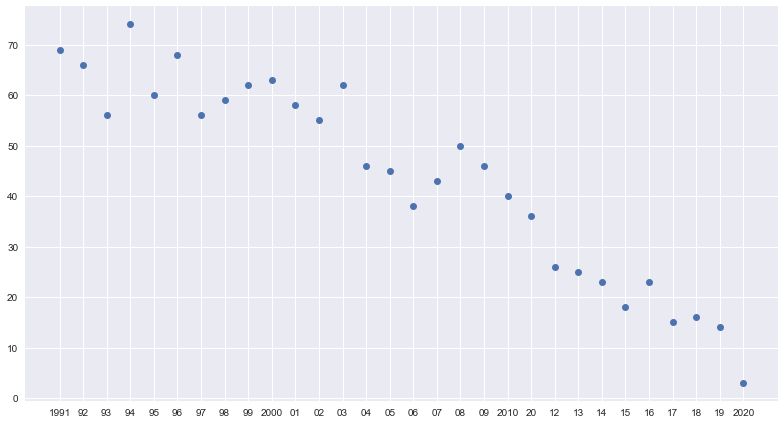

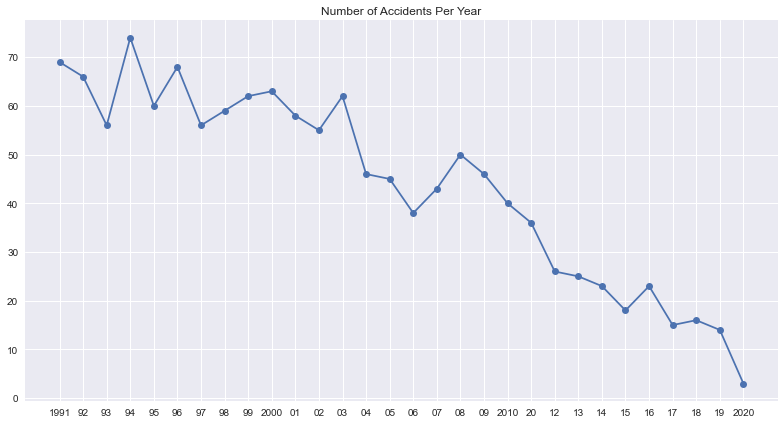

In [137]:
# 1. Is transport becoming safer?    
# 1. Graph the total number of crashes per year with respect to time to see if the industry has become safer for commercial travel
import pandas as pd
import matplotlib.pyplot as plt

date_time = non_military["DATE"]
date_time = pd.to_datetime(date_time)
                                               # plane[plane['DATE'].str.contains('1991')]
#note data only reaches mid 2020
# creating bins for each year to plot ----takes up so much time
start_date ='1991-01-10'
year92 = '1992-01-01'
year93 = '1993-01-01'
year94 = "1994-01-01"
year95 = "1995-01-01"
year96 = "1996-01-01"
year97 = "1997-01-01"
year98 = "1998-01-01"
year99 = "1999-01-01"
year00 = "2000-01-01"
year01 = "2001-01-01"
year02 = "2002-01-01"
year03 = "2003-01-01"
year04 = "2004-01-01"
year05 = "2005-01-01"
year06 = "2006-01-01"
year07 = "2007-01-01"
year08 = "2008-01-01"
year09 = "2009-01-01"
year10 = "2010-01-01"
year11 = "2011-01-01"
year12 = "2012-01-01"
year13 = "2013-01-01"
year14 = "2014-01-01"
year15 = "2015-01-01"
year16 = "2016-01-01"
year17 = "2017-01-01"
year18 = "2018-01-01"
year19 = "2019-01-01"
year20 = "2020-01-01"
year21 = "2021-01-01"    # Data stops in Mid 2020
years91_92 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= start_date) & (plane_1991_2021['DATE'] < year92)])
years92_93 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year92) & (plane_1991_2021['DATE'] < year93)])
years93_94 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year93) & (plane_1991_2021['DATE'] < year94)])
years94_95 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year94) & (plane_1991_2021['DATE'] < year95)])
years95_96 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year95) & (plane_1991_2021['DATE'] < year96)])
years96_97 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year96) & (plane_1991_2021['DATE'] < year97)])
years97_98 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year97) & (plane_1991_2021['DATE'] < year98)])
years98_99 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year98) & (plane_1991_2021['DATE'] < year99)])
years99_00 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year99) & (plane_1991_2021['DATE'] < year00)])
years00_01 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year00) & (plane_1991_2021['DATE'] < year01)])
years01_02 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year01) & (plane_1991_2021['DATE'] < year02)])
years02_03 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year02) & (plane_1991_2021['DATE'] < year03)])
years03_04 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year03) & (plane_1991_2021['DATE'] < year04)])
years04_05 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year04) & (plane_1991_2021['DATE'] < year05)])
years05_06 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year05) & (plane_1991_2021['DATE'] < year06)])
years06_07 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year06) & (plane_1991_2021['DATE'] < year07)])
years07_08 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year07) & (plane_1991_2021['DATE'] < year08)])
years08_09 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year08) & (plane_1991_2021['DATE'] < year09)])
years09_10 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year09) & (plane_1991_2021['DATE'] < year10)])
years10_11 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year10) & (plane_1991_2021['DATE'] < year11)])

years11_12 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year11) & (plane_1991_2021['DATE'] < year12)])
years12_13 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year12) & (plane_1991_2021['DATE'] < year13)])
years13_14 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year13) & (plane_1991_2021['DATE'] < year14)])
years14_15 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year14) & (plane_1991_2021['DATE'] < year15)])
years15_16 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year15) & (plane_1991_2021['DATE'] < year16)]) 
years16_17 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year16) & (plane_1991_2021['DATE'] < year17)])
years17_18 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year17) & (plane_1991_2021['DATE'] < year18)])
years18_19 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year18) & (plane_1991_2021['DATE'] < year19)]) 
years19_20 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year19) & (plane_1991_2021['DATE'] < year20)])
years20_21 = len(plane_1991_2021[(plane_1991_2021['DATE'] >= year20) & (plane_1991_2021['DATE'] < year21)])




import matplotlib.pyplot as plt
from datetime import datetime, timedelta
plt.style.use('seaborn')

dates = ["1991","92","93","94","95",'96',"97","98","99", "2000", 
        "01", "02", "03", "04", "05", "06", "07", "08", "09", "2010", 
        "20", "12","13", "14", "15", "16", "17", "18", "19", "2020"]

y = [years91_92, years92_93, years93_94, years94_95, years95_96, years96_97, years97_98, years98_99 ,
    years99_00, years00_01, years01_02, years02_03, years03_04, years04_05, years05_06, years06_07, 
    years07_08, years08_09, years09_10,years10_11, years11_12, years12_13, years13_14, 
    years14_15, years15_16, years16_17, years17_18, years18_19, years19_20, years20_21]
plt.rcParams["figure.figsize"] = [11, 6]
plt.rcParams["figure.autolayout"] = True
plt.plot_date(dates, y)
plt.tight_layout()
plt.show()
plt.title("Number of Accidents Per Year")

plt.plot_date(dates, y, linestyle ='solid')


In [138]:
plane_1991_2021[plane_1991_2021["TOTAL_FATALITIES"] ==0].head()

,DATE,TIME,LOCATION,OPERATOR,ROUTE,AIRCRAFT_TYPE,TOTAL_ONBOARD,PASSENGER_ONBOARD,CREW_ONBOARD,TOTAL_FATALITIES,PASSENGER_FATALITIES,CREW_FATALITIES,GROUND_CASUALTIES,SUMMARY_OF_EVENTS
3727,1991-12-27,08:51,"Stockholm, Sweden",Scandinavian Airlines (SAS),Stockholm-Copenhagen-Warsaw,McDonnell Douglas MD-81,129.0,123.0,6.0,0.0,0.0,0.0,0.0,"The aircraft reached an altitude of 3,000 feet..."
3759,1992-07-30,17:41,"JFK Airport, New York, New York",Trans World Airlines,New York City - San Francisco,Lockheed L-1011,292.0,280.0,12.0,0.0,0.0,0.0,0.0,"Immediately after liftoff, the stick shaker ac..."
3808,1993-03-31,12:25,"Anchorage, Alaska",Japan Air Lines,NaN,Boeing B-747-466,5.0,2.0,3.0,0.0,0.0,0.0,0.0,The No.2 engine and pylon separated from the a...
3831,1993-08-18,16:56,"Leeward Point Airfield, Guantanamo Bay, Cuba",American International Airways,"Norfolk, VA - Guantanamo, Cuba",McDonnell Douglas DC-8-61,3.0,0.0,3.0,0.0,0.0,0.0,0.0,The cargo plane crashed 1/4 of a mile short of...
3856,1994-03-02,17:59,"New York, New York",Continental Airlines,New York City - Denver,McDonnell Douglas MD-82,116.0,110.0,6.0,0.0,0.0,0.0,0.0,The aircraft overran the runway and came to re...


In [139]:
# 2.  What vehicles are you most likely to survive if there is one fatality or more?

fatlaities_abovezero = non_military[non_military['TOTAL_FATALITIES'] >= 1 ]
fatlaities_abovezero


,DATE,TIME,LOCATION,OPERATOR,ROUTE,AIRCRAFT_TYPE,TOTAL_ONBOARD,PASSENGER_ONBOARD,CREW_ONBOARD,TOTAL_FATALITIES,PASSENGER_FATALITIES,CREW_FATALITIES,GROUND_CASUALTIES,SUMMARY_OF_EVENTS
3661,1991-01-30,13:00,"Jalaludin, Indonesia",Merpati Nusantara Airlines,Manado - Gorontalo,CASA 212 Aviocar 200,21.0,18.0,3.0,1.0,1.0,0.0,0.0,The plane made a forced landing during poor we...
3663,1991-02-01,18:07,"LAX, Los Angeles, California",USAir / Skywest Airlines,Columbus - Los Angeles \ Los Angeles - Fresno,Boeing B-737-300 / Swearingen SA-227AC,101.0,93.0,8.0,34.0,30.0,4.0,0.0,The Skywest Metroliner was told to taxi into p...
3666,1991-02-17,00:20,"Cleveland, Ohio",Ryan International Airlines,Cleveland - Indianapolis,McDonnell Douglas DC-9-15RC,2.0,0.0,2.0,2.0,0.0,2.0,0.0,The cargo plane stalled during takeoff cart wh...
3667,1991-02-20,15:24,"Puerto Williams, Chile",LAN,Punta Arenas - Puerto Williams,British Aerospace BAE-146-200A,72.0,65.0,7.0,20.0,20.0,0.0,0.0,The plane overran the runway on approach and s...
3669,1991-03-03,09:44,"Near Colorado Springs, Colorado",United Air Lines,Denver - Colorado Springs,Boeing B-737-291,25.0,20.0,5.0,25.0,20.0,5.0,0.0,"While on final approach to Colorado Springs, t..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4969,2019-10-04,NaN,"Lviv, Ukraine",Ukraine Air Alliance,Spain – Turkey,Antonov An-12BK,8.0,1.0,7.0,5.0,1.0,4.0,0.0,"The chartered cargo plane, planning to stop fo..."
4970,2019-11-24,NaN,"Goma, Democratic Republic of Congo",Busy Bee Congo,NaN,Dornier 228-201,19.0,17.0,2.0,19.0,17.0,2.0,10.0,The passenger plane crashed about a minute aft...
4971,2019-12-27,07:22,"Almaty, Kazakhstan",Bek Air,Almaty - Nursultan Nazabavev,Fokker 100,98.0,95.0,3.0,13.0,NaN,NaN,7.0,"While taking off, the tail of the plane struck..."
4973,2020-01-08,NaN,"Near Shahriah, Iran",Ukraine International Airlines,Tehran - Kiev,Boeing 737-8KV WL,176.0,167.0,9.0,176.0,167.0,9.0,0.0,The plane took off from Tehran International A...


In [140]:
# find the number of plane crashes with one fatality or more
plane_num = len(fatlaities_abovezero)
plane_num
print(f"The number of plane crashes with one fatality or more is {plane_num}")

The number of plane crashes with one fatality or more is 1078


In [141]:
# lets look at the chance of surviving a plane crash with 1 or more fatality

mean_death = fatlaities_abovezero["TOTAL_FATALITIES"].mean()
mean_total_onboard = fatlaities_abovezero["TOTAL_ONBOARD"].mean()
mean_death, mean_total_onboard

percent_survive= round((100*(1 -mean_death/mean_total_onboard)), 1)

# {:.0%}----format for % ?
print(f"The average number of people on commerical planes was  {round(mean_total_onboard)} \n and the average number of fatalities was: {round(mean_death)}.")
print(f" Therefore the chance of survival on plane crashes with 1 more more fatalities is {percent_survive} percent")



The average number of people on commerical planes was  36 
 and the average number of fatalities was: 25.
 Therefore the chance of survival on plane crashes with 1 more more fatalities is 31.6 percent


In [142]:
#lets take a look at the total number of plane types to get an indication of the worst planes
plane_1991_2021["AIRCRAFT_TYPE"].value_counts()

De Havilland Canada DHC-6 Twin Otter 300    43
Antonov AN-26                               19
Yakovlev YAK-40                             14
Let 410UVP                                  11
Douglas DC-3C                                9
                                            ..
Boeing B-737-204C                            1
Hawker Siddeley HS-748-501 Super 2B          1
Boeing 757-204                               1
Dassault Falcon 900B                         1
Boeing 737-86J                               1
Name: AIRCRAFT_TYPE, Length: 863, dtype: int64

In [143]:
lotof_failure_count = non_military["AIRCRAFT_TYPE"].value_counts()

#Find the top ten aircraft types with the largest number of failures
top10 = lotof_failure_count.nlargest(n=10)
top10



De Havilland Canada DHC-6 Twin Otter 300    39
Yakovlev YAK-40                             13
Antonov AN-26                               12
Let 410UVP                                  10
Douglas DC-3C                                9
Fokker F-27 Friendship 600                   9
McDonnell Douglas MD-82                      8
Embraer 110P1 Bandeirante                    8
Fokker 100                                   7
Let 410UVP-E                                 7
Name: AIRCRAFT_TYPE, dtype: int64

In [144]:
# What were the most dangerous routes?  ROUTE
route_count = non_military["ROUTE"].value_counts()
route_count.nlargest(n=5)




Sightseeing             19
Training                10
Villavicencio - Mitu     4
Huambo - Luanda          3
Lagos - Abuja            3
Name: ROUTE, dtype: int64

In [145]:
training  = non_military[non_military['ROUTE']=="Villavicencio - Mitu"]["LOCATION"]
training.value_counts()


Villavicencio, Colombia    2
Bogota, Colombia           1
Mitu, Colombia             1
Name: LOCATION, dtype: int64

In [146]:
sr  = non_military[non_military['ROUTE']=="Sightseeing"]["LOCATION"]
sr

3770                                Hana, Hawaii
3890                              Kodiak, Alaska
4131                       Mt. Waialeale, Hawaii
4192                              Juneau, Alaska
4428                             Volcano, Hawaii
4440                     Waialeale,Kauai, Hawaii
4450                      Near Meadview, Arizona
4602                         Princeville, Hawaii
4623                         Rudyerd Bay, Alaska
4624                              Moscow, Russia
4626                      Near Ketchikan, Alaska
4804                       Near Kathmandu, Nepal
4808              Near Kilohana, Molokai, Hawaii
4810                      Near Henderson, Nevada
4890                           Ella Lake, Alaska
4902      Fox Glacier, South Valley, New Zealand
4912                Near Pigeon Forge, Tennessee
4943                       Grand Canyon, Arizona
4947                          New York, New York
Name: LOCATION, dtype: object

In [147]:
Hawaii = sr[sr.str.contains(", Hawaii")].count()
Alaska = sr[sr.str.contains(", Alaska")].count()
Arizona = sr[sr.str.contains(", Arizona")].count()
print(f"The most common areas for aircraft failure are:\n Hawaii with {Hawaii} incidents\n Alaska with {Alaska} incidents\n and Arizona with {Arizona} incidents\n") 



The most common areas for aircraft failure are:
 Hawaii with 6 incidents
 Alaska with 5 incidents
 and Arizona with 2 incidents



In [148]:
# What contributed to fatal accidents?
# need to find a way to call the full excell content for the summary of events
non_military["SUMMARY_OF_EVENTS"]


3661    The plane made a forced landing during poor we...
3663    The Skywest Metroliner was told to taxi into p...
3666    The cargo plane stalled during takeoff cart wh...
3667    The plane overran the runway on approach and s...
3669    While on final approach to Colorado Springs, t...
                              ...                        
4969    The chartered cargo plane, planning to stop fo...
4970    The passenger plane crashed about a minute aft...
4971    While taking off, the tail of the plane struck...
4973    The plane took off from Tehran International A...
4974    While landing duriing high winds and heavey ra...
Name: SUMMARY_OF_EVENTS, Length: 1101, dtype: object